<a href="https://colab.research.google.com/github/Devansharma/Health-App/blob/main/Liver_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("C:\\Users\\koush\\OneDrive\\Documents\\AI-based-Healthcare-Chatbot-and-Disease-Detection-System\\Indian Liver Patient Dataset (ILPD).csv")

In [3]:
df.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumin           583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           579 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
tot_bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
direct_bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
tot_proteins,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
albumin,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
ag_ratio,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
sgpt,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
sgot,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
alkphos,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
is_patient,583.0,1.286449,0.452490,1.0,1.0,1.00,2.0,2.0


In [6]:
print(df.columns)
df.isnull().sum()

Index(['age', 'gender', 'tot_bilirubin', 'direct_bilirubin', 'tot_proteins',
       'albumin', 'ag_ratio', 'sgpt', 'sgot', 'alkphos', 'is_patient'],
      dtype='object')


age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64

Number of patients diagnosed with liver disease: 416
Number of patients not diagnosed with liver disease: 167


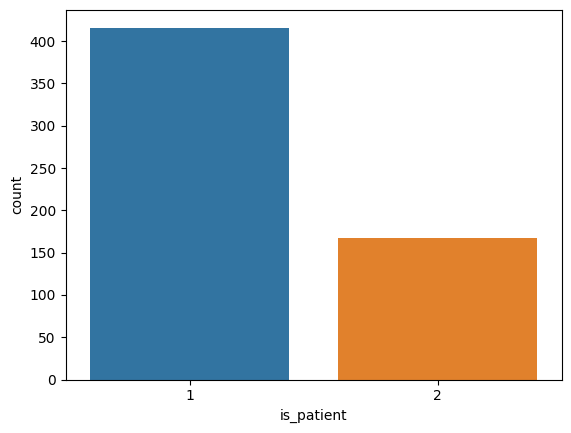

In [7]:
sns.countplot(data=df, x='is_patient', label='Count')
LD, NLD = df['is_patient'].value_counts()
print('Number of patients diagnosed with liver disease: {}'.format(LD))
print('Number of patients not diagnosed with liver disease: {}'.format(NLD))


C:\Users\koush\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


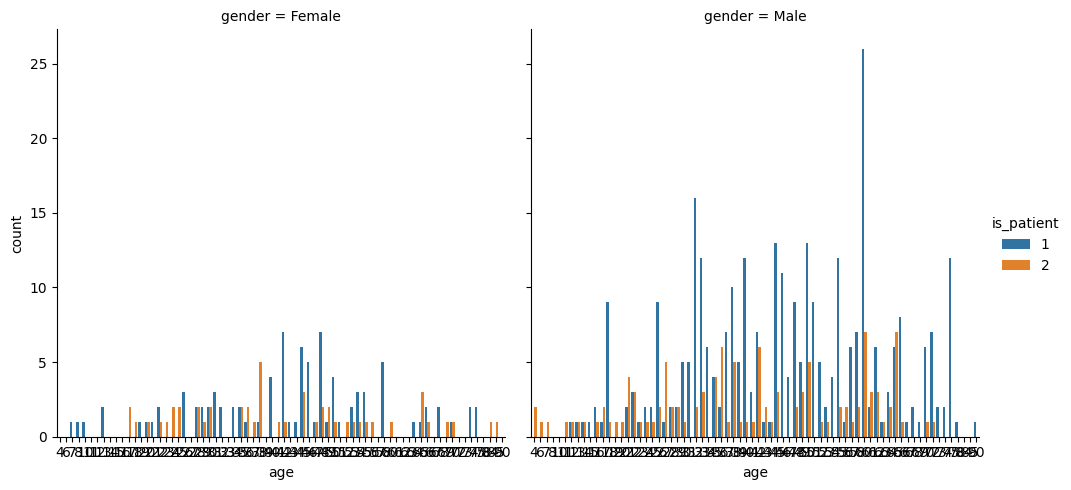

In [8]:
sns.catplot(x="age", hue="is_patient", col="gender", data=df, kind="count")


C:\Users\koush\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Disease by Gender and Age')

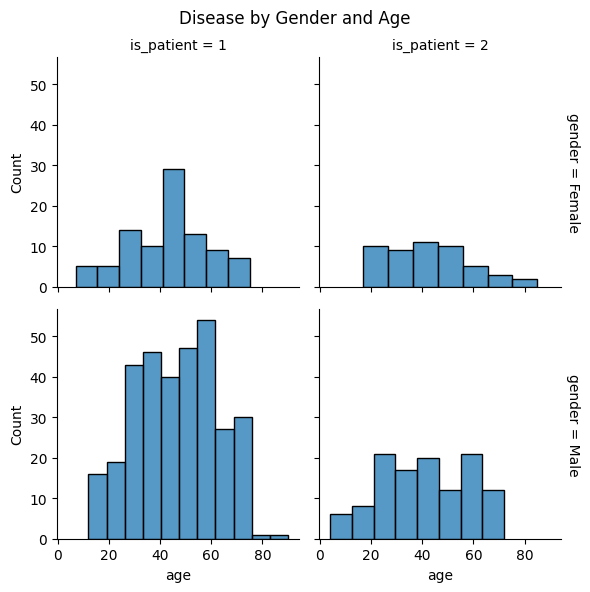

In [9]:
g = sns.FacetGrid(df, col="is_patient", row="gender", margin_titles=True)
g.map_dataframe(sns.histplot, x="age")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age')


C:\Users\koush\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Direct Bilirubin vs Total Bilirubin by Gender and Disease Status')

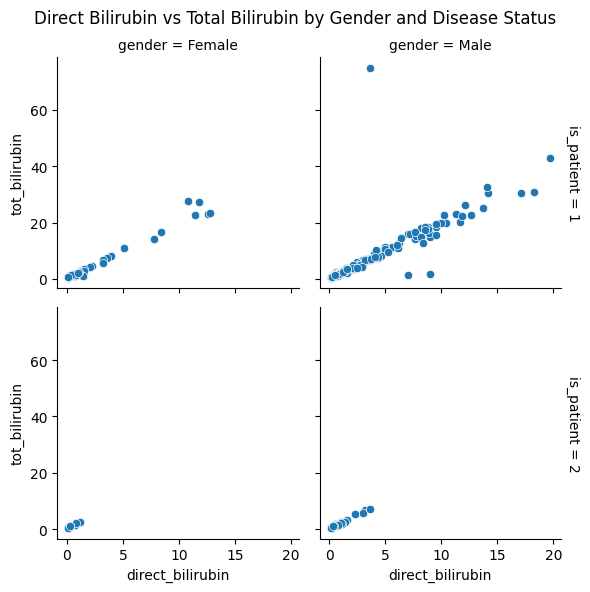

In [10]:
g = sns.FacetGrid(df, col="gender", row="is_patient", margin_titles=True)
g.map_dataframe(sns.scatterplot, x="direct_bilirubin", y="tot_bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Direct Bilirubin vs Total Bilirubin by Gender and Disease Status')


In [11]:
df["albumin"] = df["albumin"].fillna(df["albumin"].mean())





In [12]:
X = df.drop(['gender', 'is_patient'], axis=1)
y = df['is_patient']  # 1 for no liver disease; 2 for liver disease


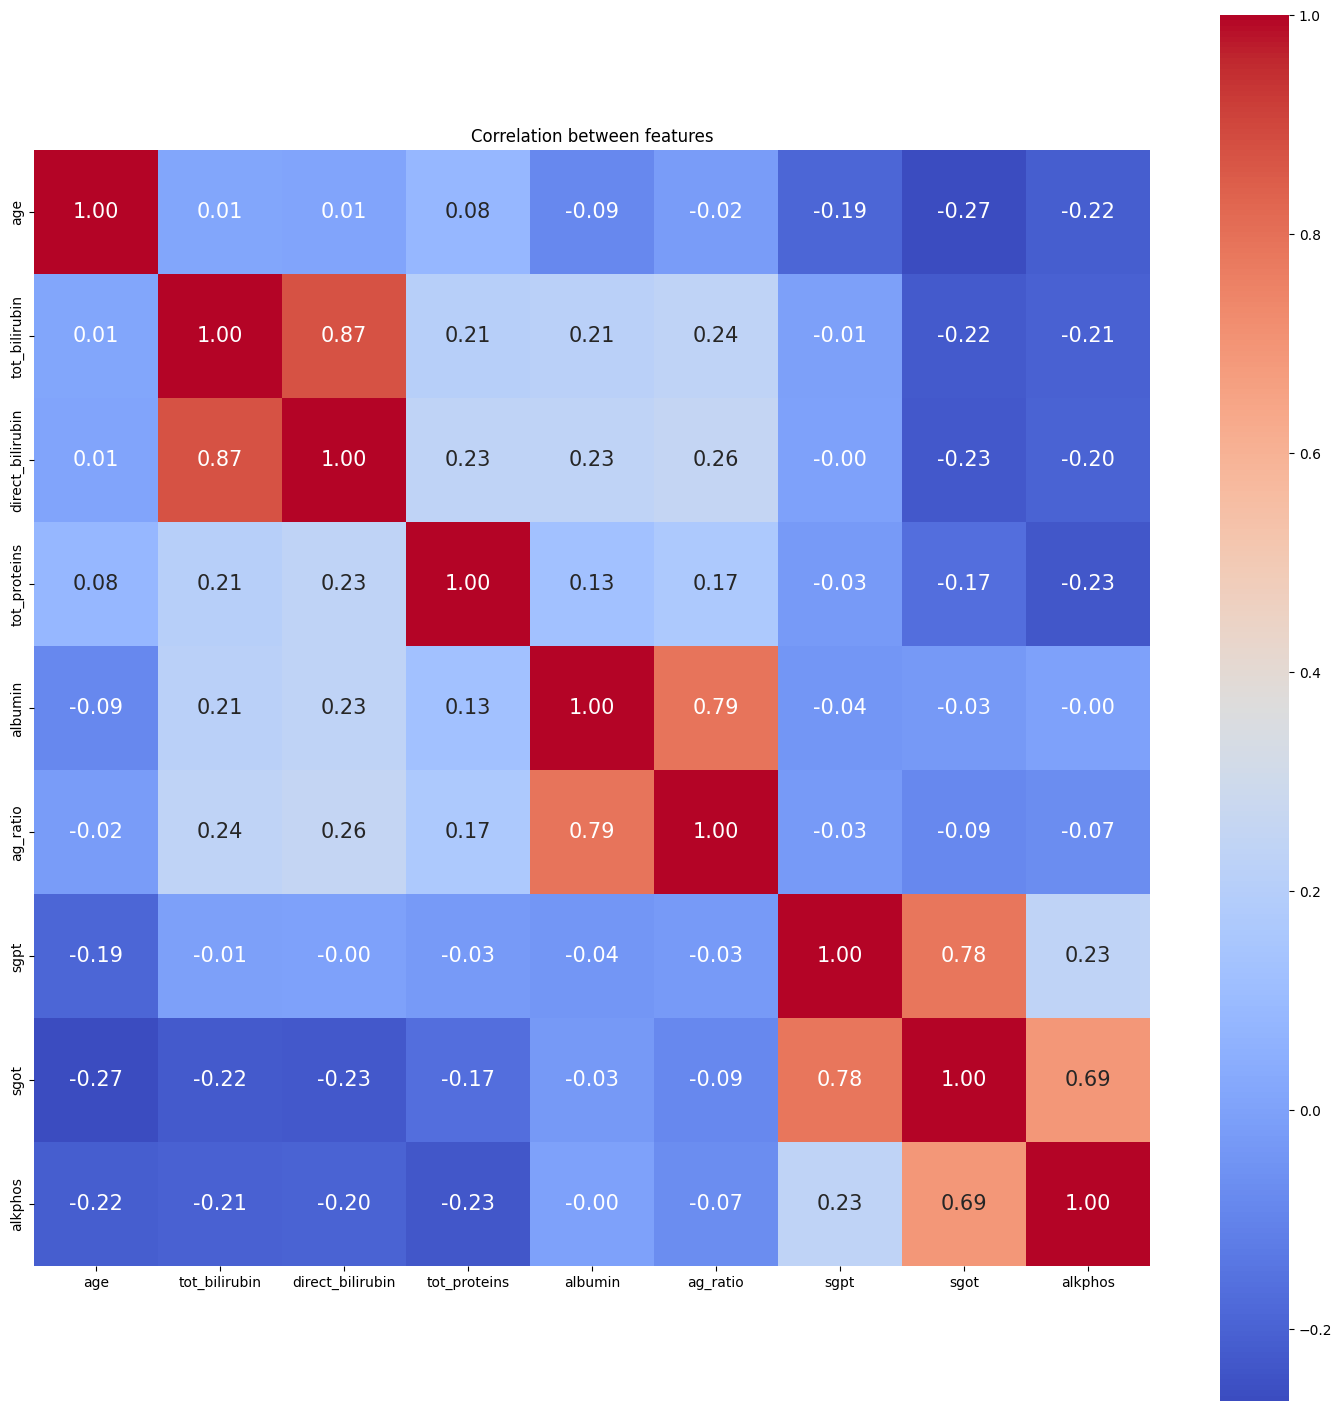

In [13]:
liver_corr = X.corr()
plt.figure(figsize=(18,18))
sns.heatmap(liver_corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title('Correlation between features');

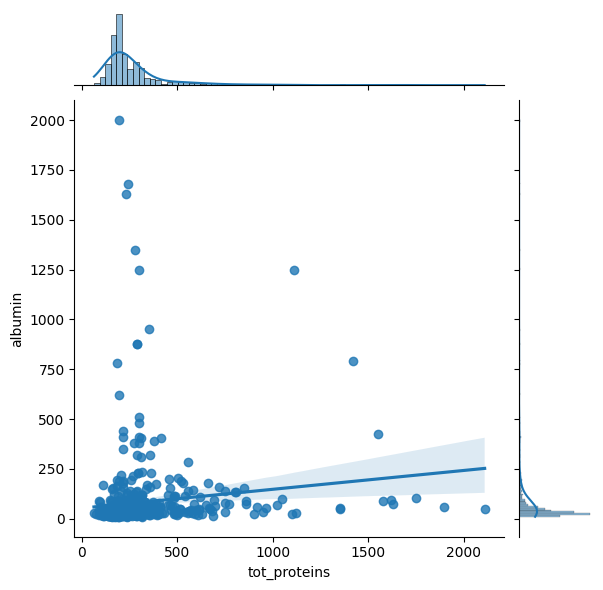

In [14]:
sns.jointplot(x="tot_proteins", y="albumin", data=df, kind="reg")

